# 1D Mapping 

## Uploading Data

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import sys
import numpy as np
from matplotlib.ticker import ScalarFormatter
sys.path.insert(0, '/Users/deal.137/Magnetar/athena/vis/python')
import athena_read
import matplotlib as mpl
import matplotlib.pyplot as plt
import cmasher as cmr
from scipy.interpolate import interp2d

data = athena_read.athdf('/Users/deal.137/Magnetar/parker.prim.00005.athdf')
r=data['x1v']
vr=data['vel1']
rho=data['rho']
press=data['press']


data_uov = athena_read.athdf('/Users/deal.137/Magnetar/parker.uov.00005.athdf')
temp=data_uov['dt1'] #temperature
qdot=data_uov['dt2'] #neutrino heating/cooling rate
cs=data_uov['dt3']   #adiabatic sound speed




## Graphing inputs

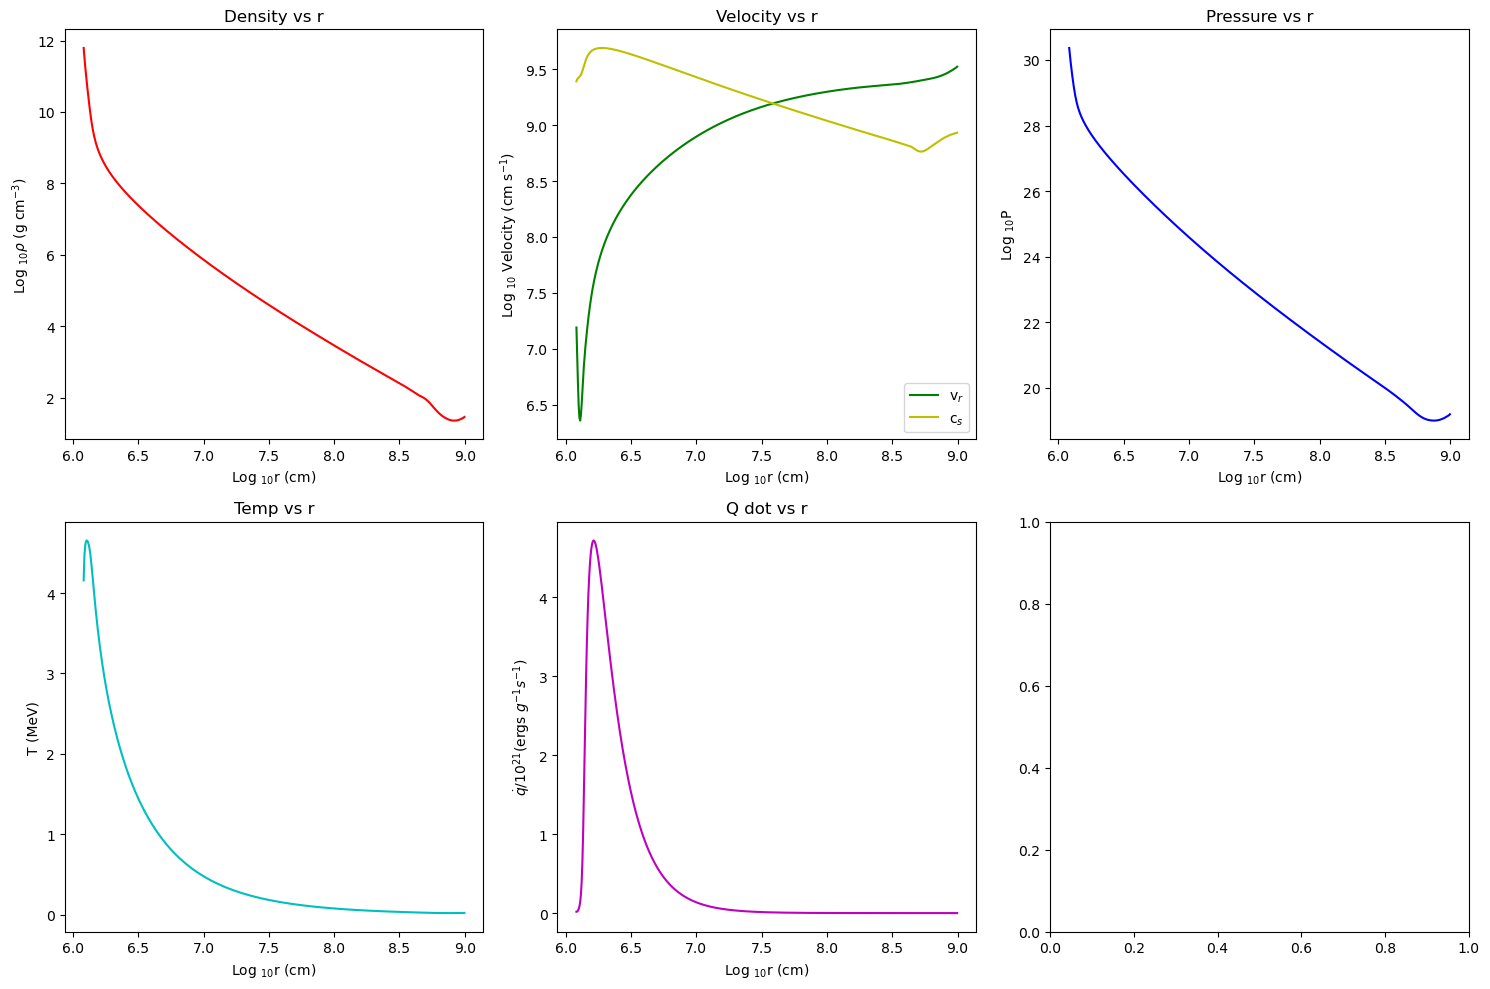

In [2]:
import matplotlib.pyplot as plt
# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))  # 1 row, 3 columns

# First scatter plot
axs[0,0].plot(np.log10(r),np.log10(rho[0][0]), color='r')
axs[0,0].set_title('Density vs r')
axs[0,0].set_xlabel('Log $_{10}$r (cm)')
axs[0,0].set_ylabel(r'Log $_{10}\rho$ (g cm$^{-3}$)')

# Second scatter plot
axs[0,1].plot(np.log10(r),np.log10(vr[0][0]), color='g',label='v$_r$')
axs[0,1].plot(np.log10(r),np.log10(cs[0][0]), color='y', label = 'c$_s$')
axs[0,1].set_title('Velocity vs r')
axs[0,1].set_xlabel('Log $_{10}$r (cm)')
axs[0,1].set_ylabel(r'Log $_{10}$ Velocity (cm s$^{-1}$)')
axs[0,1].legend()
# Third scatter plot
axs[0,2].plot(np.log10(r),np.log10(press[0][0]), color='b')
axs[0,2].set_title('Pressure vs r')
axs[0,2].set_xlabel('Log $_{10}$r (cm)')
axs[0,2].set_ylabel('Log $_{10}$P')


# Fourth scatter plot
axs[1, 0].plot(np.log10(r),temp[0][0]/10**10, color='c')
axs[1, 0].set_title('Temp vs r')
axs[1, 0].set_xlabel('Log $_{10}$r (cm)')
axs[1, 0].set_ylabel('T (MeV)')

# Fifth scatter plot
axs[1, 1].plot(np.log10(r),qdot[0][0]/10**21, color='m')
axs[1, 1].set_title('Q dot vs r')
axs[1, 1].set_xlabel('Log $_{10}$r (cm)')
axs[1, 1].set_ylabel('$\dot{q} / 10^{21}$(ergs $g^{−1} s^{−1})$')







# Adjust layout
plt.tight_layout()

# Display the plot
plt.savefig("Magnetar_ex1.png")
plt.show()


In [3]:
r=(data['x1v'])[np.newaxis,np.newaxis,:]
sth=(np.sin(data['x2v']))[np.newaxis,:,np.newaxis]
dphi=(np.diff(data['x3f']))[:,np.newaxis,np.newaxis]
dth=(np.diff(data['x2f']))[np.newaxis,:,np.newaxis]
mdot=np.sum(rho*vr*sth*r*r*dth*dphi,axis=(0,1))
msolar=2*10**33

Text(0, 0.5, 'Log $_{10} \\dot{M}$')

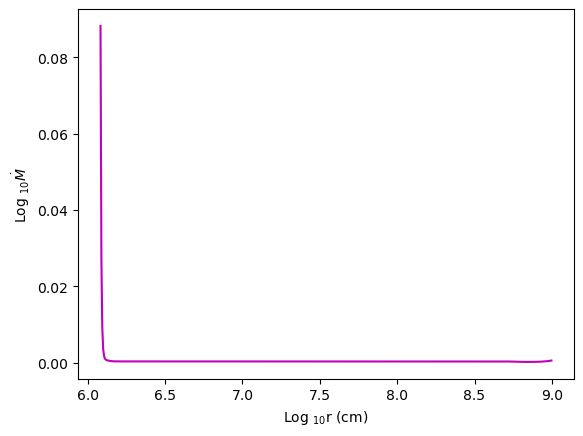

In [4]:
plt.plot(np.log10(r[0][0]),mdot/msolar, color='m')
plt.xlabel('Log $_{10}$r (cm)')
plt.ylabel('Log $_{10} \dot{M}$')

# 2D Mapping

# Color map with Mag Field

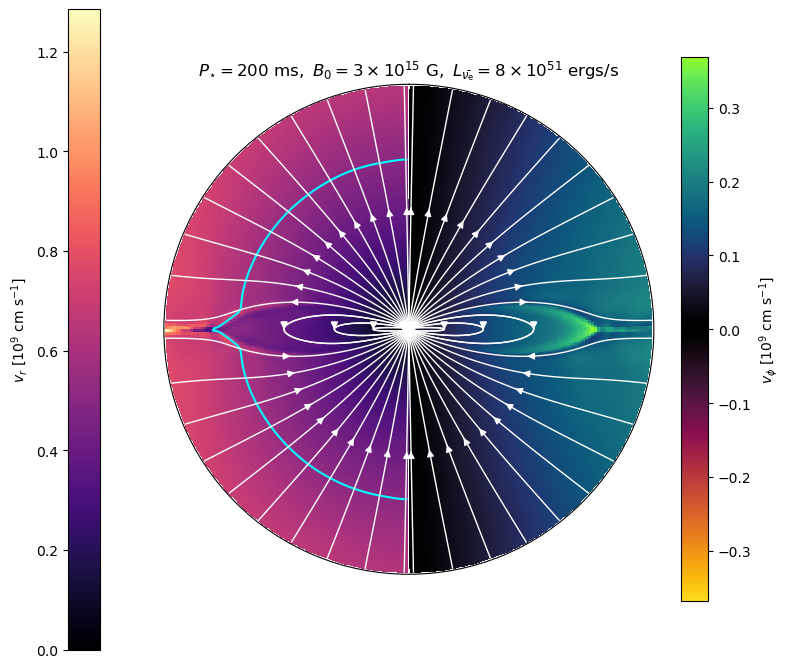

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import athena_read
import cmasher as cmr
from scipy.interpolate import RectBivariateSpline
import os

# === Load Athena++ data ===
prim_file = '/Users/deal.137/magnetar_Osc/out_mag/parker.prim.00005.athdf'
uov_file = '/Users/deal.137/magnetar_Osc/out_mag/parker.uov.00005.athdf'
data = athena_read.athdf(prim_file)
data_uov = athena_read.athdf(uov_file)
#=== Extract coordinates and variable with masking ===
r_min = np.min(data['x1v']) #set r_min
r_max= 1e7
mask= (data['x1v'] >= r_min) & (data['x1v'] <= r_max)
# Create a separate mask for the cell face data
mask_f = (data['x1f'] >= r_min) & (data['x1f'] <= r_max)


# === Extract coordinates and variables ===
r = data['x1v'][mask]
theta = data['x2v']
rf = data['x1f'][mask_f]
thetaf = data['x2f']
vr = data['vel1'][0][:,mask]
vphi = data['vel3'][0][:, mask]
temp = data_uov['dt1'][0][:,mask]
br = data['Bcc1'][0][:,mask]
bth = data['Bcc2'][0][:,mask]

# === Create polar plot ===
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))

# === Create meshgrids ===
r_grid, theta_grid = np.meshgrid(r, theta)

# === Plot radial velocity ===
norm_vr = mpl.colors.Normalize(vmin=0, vmax=np.max(vr)/1e9)
pcm_vr = ax.pcolormesh(theta_grid, r_grid, vr / 1e9, cmap='magma', shading='auto', norm=norm_vr)
cb1 = plt.colorbar(pcm_vr, ax=ax, location='left', fraction=0.05)
cb1.set_label(r'$v_r\ \left[10^9\ {\rm cm}\ {\rm s}^{-1}\right]$')

# === Plot azimuthal velocity ===
vmax_phi= np.max(np.abs(vphi/1e9))
norm_vphi = mpl.colors.Normalize(vmin=-vmax_phi, vmax=vmax_phi)
pcm_vphi = ax.pcolormesh(-theta_grid, r_grid, vphi / 1e9, cmap=cmr.wildfire_r, shading='auto', norm=norm_vphi)
cb2 = plt.colorbar(pcm_vphi, ax=ax, location='right', fraction=0.05)
cb2.set_label(r'$v_{\phi}\ \left[10^9\ {\rm cm}\ {\rm s}^{-1}\right]$')

# === Plot temperature contour (example level at T ~ 1 MeV) ===
contour_temp = temp * 8.6173e-11 / 0.5  # convert dt1 to T in MeV
ax.contour(theta_grid, r_grid, contour_temp, levels=[1], colors='cyan', linewidths=1.5)

# === Prepare interpolation for magnetic fields ===
interp_nth=300
r_interp = np.linspace(r[0], rf[-1], 300)
theta_interp = np.linspace(theta[0], theta[-1], 300)
theta_interp_mirrored = np.linspace(-theta[-1], -theta[0], interp_nth)
r_mesh, theta_mesh = np.meshgrid(r_interp, theta_interp)

# Interpolators
Br_spline = RectBivariateSpline(r, theta, br.T)
Bth_spline = RectBivariateSpline(r, theta, bth.T)

# Evaluate interpolated fields
Br_interp = Br_spline(r_interp, theta_interp)
Bth_interp = Bth_spline(r_interp, theta_interp)

# Mirror data for both hemispheres
Br_mirror = Br_interp[:, ::-1]
Bth_mirror = -Bth_interp[:, ::-1]

# === Streamline seed points ===
st_nth = 32
st_pts = np.linspace(thetaf[1], thetaf[-2], st_nth)
r0 = r[0]
start_pts_top = np.array([st_pts, [r0]*st_nth]).T
start_pts_bot = np.array([-st_pts[::-1], [r0]*st_nth]).T

# === Plot magnetic field lines (streamplot) ===
ax.streamplot(theta_interp, r_interp, Bth_interp / r_interp[:, None], Br_interp,
              density=15, linewidth=1.0, color='white', arrowsize=1,
              start_points=start_pts_top, broken_streamlines=False)

ax.streamplot(theta_interp_mirrored, r_interp, Bth_mirror / r_interp[:, None], Br_mirror,
              density=15, linewidth=1.0, color='white', arrowsize=1,
              start_points=start_pts_bot, broken_streamlines=False)

# === Final plot adjustments ===
ax.set_ylim([r[0], 1e7])
ax.set_theta_offset(0.5*np.pi)
ax.grid(False)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title(r'$P_{\star}=200\ {\rm ms},\ B_0=3\times 10^{15}\ {\rm G},\ L_{\bar{\nu_{\rm e}}}=8\times 10^{51}\ {\rm ergs/s}$')
plt.tight_layout()
plt.savefig('out_mag_00005.jpg')
plt.show()


## Generating Multiple Images of the Plots 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import athena_read
import cmasher as cmr
from scipy.interpolate import RectBivariateSpline
import os

# Define the range of file indices (from 0 to 11, inclusive)
start_index = 0
end_index = 100

# === Define Directories and Filename Structure ===
base_input_dir = '/Users/deal.137/magnetar_Osc/out_mag_redo/'
output_dir = '/Users/deal.137/Magnetar/mag_field_photos' # New output folder
base_prim_name = 'parker.prim.'
base_uov_name = 'parker.uov.'
extension = '.athdf'

# 1. Create the output directory if it does not exist
os.makedirs(output_dir, exist_ok=True)
print(f"Ensuring output directory exists: {output_dir}")

# Loop through all the desired file indices
for i in range(start_index, end_index + 1):
    # Format the index as a five-digit string (e.g., 0 -> '00000', 11 -> '00011')
    index_str = f'{i:05d}'
    
    # Construct the full input file paths for the current iteration
    prim_file = os.path.join(base_input_dir, f'{base_prim_name}{index_str}{extension}')
    uov_file = os.path.join(base_input_dir, f'{base_uov_name}{index_str}{extension}')
    
    # Construct the full output path including the new directory
    output_filename = os.path.join(output_dir, f'out_mag_{index_str}.jpg')

    print(f"Processing file: {prim_file}")

    try:
        # === Load Athena++ data ===
        data = athena_read.athdf(prim_file)
        data_uov = athena_read.athdf(uov_file)
    except FileNotFoundError:
        print(f"Error: Input file not found. Skipping {prim_file}")
        continue 
    except Exception as e:
        print(f"An error occurred while reading {prim_file}: {e}")
        continue

    #=== Extract coordinates and variable with masking ===
    r_min = np.min(data['x1v']) #set r_min
    r_max= 1e7
    mask= (data['x1v'] >= r_min) & (data['x1v'] <= r_max)
    mask_f = (data['x1f'] >= r_min) & (data['x1f'] <= r_max)

    # === Extract coordinates and variables ===
    r = data['x1v'][mask]
    theta = data['x2v']
    rf = data['x1f'][mask_f]
    thetaf = data['x2f']
    
    if r.size == 0 or theta.size == 0:
        print(f"Warning: Masking resulted in empty coordinate arrays for {prim_file}. Skipping.")
        continue

    vr = data['vel1'][0][:,mask]
    vphi = data['vel3'][0][:, mask]
    temp = data_uov['dt1'][0][:,mask]
    br = data['Bcc1'][0][:,mask]
    bth = data['Bcc2'][0][:,mask]


    # === Create polar plot ===
    plt.close('all') 
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))

    # === Create meshgrids ===
    r_grid, theta_grid = np.meshgrid(r, theta)

    # === Plot radial velocity ===
    v_r_max = np.max(vr) if vr.size > 0 else 1.0 
    norm_vr = mpl.colors.Normalize(vmin=0, vmax=v_r_max/1e9)
    pcm_vr = ax.pcolormesh(theta_grid, r_grid, vr / 1e9, cmap='magma', shading='auto', norm=norm_vr)
    cb1 = plt.colorbar(pcm_vr, ax=ax, location='left', fraction=0.05)
    cb1.set_label(r'$v_r\ \left[10^9\ {\rm cm}\ {\rm s}^{-1}\right]$')

    # === Plot azimuthal velocity ===
    vmax_phi= np.max(np.abs(vphi/1e9)) if vphi.size > 0 else 1.0e-9
    norm_vphi = mpl.colors.Normalize(vmin=-vmax_phi, vmax=vmax_phi)
    pcm_vphi = ax.pcolormesh(-theta_grid, r_grid, vphi / 1e9, cmap=cmr.wildfire_r, shading='auto', norm=norm_vphi)
    cb2 = plt.colorbar(pcm_vphi, ax=ax, location='right', fraction=0.05)
    cb2.set_label(r'$v_{\phi}\ \left[10^9\ {\rm cm}\ {\rm s}^{-1}\right]$')

    # === Plot temperature contour (example level at T ~ 1 MeV) ===
    contour_temp = temp * 8.6173e-11 / 0.5 
    ax.contour(theta_grid, r_grid, contour_temp, levels=[1], colors='cyan', linewidths=1.5)

    # === Prepare interpolation for magnetic fields ===
    interp_nth=300
    r_interp = np.linspace(r[0], rf[-1], 300)
    theta_interp = np.linspace(theta[0], theta[-1], 300)
    theta_interp_mirrored = np.linspace(-theta[-1], -theta[0], interp_nth)
    
    # Interpolators
    Br_spline = RectBivariateSpline(r, theta, br.T)
    Bth_spline = RectBivariateSpline(r, theta, bth.T)

    # Evaluate interpolated fields
    Br_interp = Br_spline(r_interp, theta_interp)
    Bth_interp = Bth_spline(r_interp, theta_interp)

    # Mirror data for both hemispheres
    Br_mirror = Br_interp[:, ::-1]
    Bth_mirror = -Bth_interp[:, ::-1]

    # === Streamline seed points ===
    st_nth = 32
    st_pts = np.linspace(thetaf[1], thetaf[-2], st_nth)
    r0 = r[0]
    start_pts_top = np.array([st_pts, [r0]*st_nth]).T
    start_pts_bot = np.array([-st_pts[::-1], [r0]*st_nth]).T

    # === Plot magnetic field lines (streamplot) ===
    try:
        ax.streamplot(theta_interp, r_interp, Bth_interp / r_interp[:, None], Br_interp,
                     density=15, linewidth=1.0, color='white', arrowsize=1,
                     start_points=start_pts_top, broken_streamlines=False)

        ax.streamplot(theta_interp_mirrored, r_interp, Bth_mirror / r_interp[:, None], Br_mirror,
                     density=15, linewidth=1.0, color='white', arrowsize=1,
                     start_points=start_pts_bot, broken_streamlines=False)
    except Exception as e:
        print(f"Streamplot failed for {prim_file}: {e}. Skipping streamplots for this file.")


    # === Final plot adjustments ===
    ax.set_ylim([r[0], 1e7])
    ax.set_theta_offset(0.5*np.pi)
    ax.grid(False)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_title(r'$P_{\star}=200\ {\rm ms},\ B_0=3\times 10^{15}\ {\rm G},\ L_{\bar{\nu_{\rm e}}}=8\times 10^{51}\ {\rm ergs/s}$')
    plt.tight_layout()
    
    # 2. Save the figure to the new directory
    plt.savefig(output_filename, dpi=200) 
    print(f"Saved plot to {output_filename}")

    plt.close(fig)

print("Batch processing complete.")

Ensuring output directory exists: /Users/deal.137/Magnetar/mag_field_photos
Processing file: /Users/deal.137/magnetar_Osc/out_mag_redo/parker.prim.00000.athdf
Saved plot to /Users/deal.137/Magnetar/mag_field_photos/out_mag_00000.jpg
Processing file: /Users/deal.137/magnetar_Osc/out_mag_redo/parker.prim.00001.athdf
Saved plot to /Users/deal.137/Magnetar/mag_field_photos/out_mag_00001.jpg
Processing file: /Users/deal.137/magnetar_Osc/out_mag_redo/parker.prim.00002.athdf
Saved plot to /Users/deal.137/Magnetar/mag_field_photos/out_mag_00002.jpg
Processing file: /Users/deal.137/magnetar_Osc/out_mag_redo/parker.prim.00003.athdf
Saved plot to /Users/deal.137/Magnetar/mag_field_photos/out_mag_00003.jpg
Processing file: /Users/deal.137/magnetar_Osc/out_mag_redo/parker.prim.00004.athdf
Saved plot to /Users/deal.137/Magnetar/mag_field_photos/out_mag_00004.jpg
Processing file: /Users/deal.137/magnetar_Osc/out_mag_redo/parker.prim.00005.athdf
Saved plot to /Users/deal.137/Magnetar/mag_field_photos/

## Trying to make sure the color bar is the same for every image

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import athena_read
import cmasher as cmr
from scipy.interpolate import RectBivariateSpline
import os

# Define the range of file indices (from 0 to 100, inclusive)
start_index = 0
end_index = 100 

# === Define Directories and Filename Structure ===
base_input_dir = '/Users/deal.137/magnetar_Osc/out_mag_redo/'
output_dir = '/Users/deal.137/Magnetar/mag_field_photos' 
base_prim_name = 'parker.prim.'
base_uov_name = 'parker.uov.'
extension = '.athdf'

# 1. Create the output directory if it does not exist
os.makedirs(output_dir, exist_ok=True)
print(f"Ensuring output directory exists: {output_dir}")

# =======================================================
# === PHASE 1: Determine Global Color Limits using Percentiles ===
# =======================================================

print("Scanning files to determine global color limits based on percentiles...")

# Lists to collect all relevant data values
all_vr_values = []
all_vphi_abs_values = []
PERCENTILE = 98 # Set the percentile to use (e.g., 95, 98, or 99)

for i in range(start_index, end_index + 1):
    index_str = f'{i:05d}'
    prim_file = os.path.join(base_input_dir, f'{base_prim_name}{index_str}{extension}')

    try:
        # Load only necessary quantities for the scan
        data = athena_read.athdf(prim_file, quantities=['x1v', 'vel1', 'vel3'])
    except FileNotFoundError:
        print(f"File not found: {prim_file}. Skipping scan for this file.")
        continue
    except Exception as e:
        print(f"Error reading {prim_file} during scan: {e}. Skipping.")
        continue

    # Re-apply masking logic (must be consistent with plotting loop)
    r_min = np.min(data['x1v'])
    r_max = 1e7
    mask = (data['x1v'] >= r_min) & (data['x1v'] <= r_max)

    vr = data['vel1'][0][:,mask]
    vphi = data['vel3'][0][:, mask]

    # Collect values (excluding zeros or near-zeros if necessary, but including all is generally safer)
    if vr.size > 0:
        all_vr_values.extend(vr.flatten())
    
    if vphi.size > 0:
        # We need the absolute value for vphi to determine the symmetric range
        all_vphi_abs_values.extend(np.abs(vphi).flatten())

# --- Calculate Fixed Limits ---

# Radial Velocity (vr): Since v_r is typically non-negative, we fix the minimum to 0.
if all_vr_values:
    # Use the 98th percentile to set the max limit
    V_R_MAX_FIXED = np.percentile(all_vr_values, PERCENTILE) / 1e9 
else:
    V_R_MAX_FIXED = 1.0 # Default fallback

# Azimuthal Velocity (vphi): This is bipolar (positive/negative), so we use the 98th percentile of ABSOLUTE values
if all_vphi_abs_values:
    # Use the 98th percentile of absolute values to set the max limit (for +/- range)
    V_PHI_MAX_ABS_FIXED = np.percentile(all_vphi_abs_values, PERCENTILE) / 1e9 
else:
    V_PHI_MAX_ABS_FIXED = 1.0e-9 # Default fallback

# Define FIXED Normalization objects (OUTSIDE the plotting loop)
NORM_VR_FIXED = mpl.colors.Normalize(vmin=0, vmax=V_R_MAX_FIXED)
NORM_VPHI_FIXED = mpl.colors.Normalize(vmin=-V_PHI_MAX_ABS_FIXED, vmax=V_PHI_MAX_ABS_FIXED)

print(f"Global $v_r$ max (98th percentile): {V_R_MAX_FIXED:.3e} [10^9 cm/s]")
print(f"Global $|v_\phi|$ range (98th percentile): $\pm$ {V_PHI_MAX_ABS_FIXED:.3e} [10^9 cm/s]")

# =======================================================
# === PHASE 2: Plotting Loop (Using Fixed Color Bars) ===
# =======================================================

for i in range(start_index, end_index + 1):
    index_str = f'{i:05d}'
    prim_file = os.path.join(base_input_dir, f'{base_prim_name}{index_str}{extension}')
    uov_file = os.path.join(base_input_dir, f'{base_uov_name}{index_str}{extension}')
    output_filename = os.path.join(output_dir, f'out_mag_{index_str}.jpg')

    # ... (Loading data and variable extraction remains the same) ...
    print(f"Processing file: {prim_file}")

    try:
        # Load all required data
        data = athena_read.athdf(prim_file)
        data_uov = athena_read.athdf(uov_file)
    except FileNotFoundError:
        print(f"Error: Input file not found. Skipping {prim_file}")
        continue 
    except Exception as e:
        print(f"An error occurred while reading {prim_file}: {e}")
        continue

    #=== Extract coordinates and variable with masking ===
    r_min = np.min(data['x1v'])
    r_max= 1e7
    mask= (data['x1v'] >= r_min) & (data['x1v'] <= r_max)
    mask_f = (data['x1f'] >= r_min) & (data['x1f'] <= r_max)

    # === Extract coordinates and variables ===
    r = data['x1v'][mask]
    theta = data['x2v']
    rf = data['x1f'][mask_f]
    thetaf = data['x2f']
    
    if r.size == 0 or theta.size == 0:
        print(f"Warning: Masking resulted in empty coordinate arrays for {prim_file}. Skipping.")
        continue

    vr = data['vel1'][0][:,mask]
    vphi = data['vel3'][0][:, mask]
    temp = data_uov['dt1'][0][:,mask]
    br = data['Bcc1'][0][:,mask]
    bth = data['Bcc2'][0][:,mask]

    # === Create polar plot ===
    plt.close('all') 
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))
    r_grid, theta_grid = np.meshgrid(r, theta)

    # === Plot radial velocity (USING FIXED NORM) ===
    # Use the fixed normalization object defined in PHASE 1. Values above the max will be clipped.
    pcm_vr = ax.pcolormesh(theta_grid, r_grid, vr / 1e9, cmap='magma', shading='auto', norm=NORM_VR_FIXED)
    cb1 = plt.colorbar(pcm_vr, ax=ax, location='left', fraction=0.05)
    cb1.set_label(r'$v_r\ \left[10^9\ {\rm cm}\ {\rm s}^{-1}\right]$')

    # === Plot azimuthal velocity (USING FIXED NORM) ===
    # Use the fixed normalization object defined in PHASE 1.
    pcm_vphi = ax.pcolormesh(-theta_grid, r_grid, vphi / 1e9, cmap=cmr.wildfire_r, shading='auto', norm=NORM_VPHI_FIXED)
    cb2 = plt.colorbar(pcm_vphi, ax=ax, location='right', fraction=0.05)
    cb2.set_label(r'$v_{\phi}\ \left[10^9\ {\rm cm}\ {\rm s}^{-1}\right]$')

    # ... (Rest of the plotting code: contours, interpolation, streamplots, labels) ...
    
    # Plot temperature contour
    contour_temp = temp * 8.6173e-11 / 0.5 
    ax.contour(theta_grid, r_grid, contour_temp, levels=[1], colors='cyan', linewidths=1.5)

    # Prepare interpolation for magnetic fields
    interp_nth=300
    r_interp = np.linspace(r[0], rf[-1], 300)
    theta_interp = np.linspace(theta[0], theta[-1], 300)
    theta_interp_mirrored = np.linspace(-theta[-1], -theta[0], interp_nth)
    
    Br_spline = RectBivariateSpline(r, theta, br.T)
    Bth_spline = RectBivariateSpline(r, theta, bth.T)

    Br_interp = Br_spline(r_interp, theta_interp)
    Bth_interp = Bth_spline(r_interp, theta_interp)

    Br_mirror = Br_interp[:, ::-1]
    Bth_mirror = -Bth_interp[:, ::-1]

    # Streamline seed points
    st_nth = 32
    st_pts = np.linspace(thetaf[1], thetaf[-2], st_nth)
    r0 = r[0]
    start_pts_top = np.array([st_pts, [r0]*st_nth]).T
    start_pts_bot = np.array([-st_pts[::-1], [r0]*st_nth]).T

    # Plot magnetic field lines (streamplot)
    try:
        ax.streamplot(theta_interp, r_interp, Bth_interp / r_interp[:, None], Br_interp,
                     density=15, linewidth=1.0, color='white', arrowsize=1,
                     start_points=start_pts_top, broken_streamlines=False)

        ax.streamplot(theta_interp_mirrored, r_interp, Bth_mirror / r_interp[:, None], Br_mirror,
                     density=15, linewidth=1.0, color='white', arrowsize=1,
                     start_points=start_pts_bot, broken_streamlines=False)
    except Exception as e:
        print(f"Streamplot failed for {prim_file}: {e}. Skipping streamplots for this file.")


    # Final plot adjustments
    ax.set_ylim([r[0], 1e7])
    ax.set_theta_offset(0.5*np.pi)
    ax.grid(False)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_title(r'$P_{\star}=200\ {\rm ms},\ B_0=3\times 10^{15}\ {\rm G},\ L_{\bar{\nu_{\rm e}}}=8\times 10^{51}\ {\rm ergs/s}$')
    plt.tight_layout()
    
    # Save the figure to the new directory
    plt.savefig(output_filename, dpi=200) 
    print(f"Saved plot to {output_filename}")

    plt.close(fig)

print("Batch processing complete.")

Ensuring output directory exists: /Users/deal.137/Magnetar/mag_field_photos
Scanning files to determine global color limits based on percentiles...
Global $v_r$ max (98th percentile): 7.098e-01 [10^9 cm/s]
Global $|v_\phi|$ range (98th percentile): $\pm$ 1.959e-01 [10^9 cm/s]
Processing file: /Users/deal.137/magnetar_Osc/out_mag_redo/parker.prim.00000.athdf
Saved plot to /Users/deal.137/Magnetar/mag_field_photos/out_mag_00000.jpg
Processing file: /Users/deal.137/magnetar_Osc/out_mag_redo/parker.prim.00001.athdf
Saved plot to /Users/deal.137/Magnetar/mag_field_photos/out_mag_00001.jpg
Processing file: /Users/deal.137/magnetar_Osc/out_mag_redo/parker.prim.00002.athdf
Saved plot to /Users/deal.137/Magnetar/mag_field_photos/out_mag_00002.jpg
Processing file: /Users/deal.137/magnetar_Osc/out_mag_redo/parker.prim.00003.athdf
Saved plot to /Users/deal.137/Magnetar/mag_field_photos/out_mag_00003.jpg
Processing file: /Users/deal.137/magnetar_Osc/out_mag_redo/parker.prim.00004.athdf
Saved plot t

## Video with two frames

## Using PIL

In [8]:
from PIL import Image
import imageio.v3 as iio

def create_crossfade_animation(image1_path, image2_path, output_filename, frames_per_fade=20):
    """
    Creates a GIF animation by cross-fading from image1 to image2.

    Args:
        image1_path (str): Path to the first image.
        image2_path (str): Path to the second image.
        output_filename (str): Name of the output GIF file.
        frames_per_fade (int): Number of frames for the fade effect.
    """
    try:
        # 1. Open and prepare the images
        img1 = Image.open(image1_path).convert("RGB")
        img2 = Image.open(image2_path).convert("RGB")

        # Resize the second image to match the first for a smooth fade
        if img1.size != img2.size:
            img2 = img2.resize(img1.size)

        # 2. Generate the cross-fade frames
        frames = []
        for i in range(frames_per_fade + 1):
            # The 'alpha' or weight for image 2 (goes from 0.0 to 1.0)
            alpha = i / frames_per_fade
            # The weight for image 1 (goes from 1.0 to 0.0)
            beta = 1.0 - alpha

            # Blend the two images
            # formula: new_pixel = (img1_pixel * beta) + (img2_pixel * alpha)
            blended_img = Image.blend(img1, img2, alpha)

            frames.append(blended_img)
            
        # 3. Save the frames as an animated GIF
        # The 'frames' argument should be a list of PIL Image objects or NumPy arrays
        # 'duration' controls the time each frame is displayed (in milliseconds)
        # Note: imageio uses 'duration' in seconds per frame for GIF, so 0.1s is 100ms
        iio.imwrite(
            output_filename, 
            frames, 
            duration=0.1,  # 10 frames per second (0.1 seconds per frame)
            loop=0        # 0 means loop forever
        )

        print(f"Successfully created animation: {output_filename}")

    except FileNotFoundError:
        print("Error: One or both image files were not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

# --- Example Usage ---
# NOTE: Replace 'image1.jpg' and 'image2.jpg' with your actual file paths
create_crossfade_animation('/Users/deal.137/Magnetar/out_mag_00005.jpg', '/Users/deal.137/Magnetar/out_mag_00006.jpg', 'two_picture_fade.gif')

Successfully created animation: two_picture_fade.gif


## Creating a MP4

In [4]:
import os
import imageio.v3 as iio

# --- Configuration ---
dir_name = '/Users/deal.137/Magnetar/mag_field_photos'  # directory of image files (where out_mag_00005.jpg and out_mag_00006.jpg are located)
output_filename = 'mag_movie_redo.mp4'
frame_rate =7  # The video will show 2 frames per second (adjust as desired)

images = [] # List to store the loaded image data (frames)

# --- 1. Filter and Sort Image Files ---
# Filter for .jpg files and ensure they are sorted numerically
file_list = [
    fn for fn in os.listdir(dir_name) 
    if not fn.startswith('.') and fn.endswith('.jpg')
]

# Ensure the files are processed in the correct sequential order (e.g., 00005 then 00006)
file_list.sort() 

# --- 2. Load Images into Frames List ---
for fn in file_list:
    fp = os.path.join(dir_name, fn)
    # Using imageio.v3.imread for modern imageio usage
    im = iio.imread(fp)
    images.append(im)

# --- 3. Save Frames as a Video File ---
output_path = os.path.join(dir_name, output_filename)

# The 'fps' (frames per second) argument controls the speed of the movie.
iio.imwrite(
    output_path, 
    images,           # Pass the list of image arrays (frames)
    extension=".mp4", # Explicitly set the extension if needed
    # The 'fps' argument and other video settings are passed directly here
    fps=frame_rate,   
    quality=8,
    macro_block_size=8 
)

print(f"Successfully created video: {output_path} with {len(images)} frames at {frame_rate} FPS.")

Successfully created video: /Users/deal.137/Magnetar/mag_field_photos/mag_movie_redo.mp4 with 101 frames at 7 FPS.
